In [1]:
# Load necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Load the dataset
df = pd.read_csv('mushroom.csv')
df.head(15)

Unnamed: 0 cap_shape cap_surface cap_color bruises      odor  \
0         1167    sunken       scaly     white      no     anise   
1         1037    sunken     fibrous       red      no     anise   
2          309      flat     grooves    purple     yes      foul   
3          282      bell       scaly      pink     yes     fishy   
4          820      flat      smooth    yellow     yes     musty   
5          389    convex     grooves      pink      no     spicy   
6          330      bell      smooth     brown      no     anise   
7           98   conical     fibrous     white     yes      none   
8          597   conical     grooves     green     yes   pungent   
9           16    convex       scaly     brown     yes    almond   
10         243    convex       scaly      buff     yes     fishy   
11         621      bell      smooth     brown     yes      none   
12         875    sunken     grooves      gray     yes  creosote   
13         221      flat      smooth      buff      no   pungent   
14        1178    sunken       scaly      gray     yes   pungent   

   gill_attachment gill_spacing gill_size gill_color stalk_shape stalk_root  \
0       descending      distant     broad       pink    tapering        cup   
1          notched      crowded    narrow  chocolate   enlarging     rooted   
2       descending      crowded     broad     purple    tapering        cup   
3          notched        close     broad     orange   enlarging       club   
4             free      crowded    narrow     orange   enlarging    missing   
5         attached      crowded     broad     orange   enlarging       club   
6             free      distant     broad       buff    tapering    missing   
7          notched        close    narrow      black    tapering      equal   
8         attached      crowded    narrow       buff    tapering       club   
9         attached      crowded     broad        red    tapering    bulbous   
10        attached        close     broad     purple   enlarging      equal   
11         notched      distant     broad      black    tapering        cup   
12         notched      crowded    narrow      green   enlarging      equal   
13      descending      distant     broad      brown    tapering    bulbous   
14            free      crowded    narrow     purple   enlarging       club   

   stalk_surface_above_ring stalk_surface_below_ring stalk_color_above_ring  \
0                    smooth                    silky                   gray   
1                     silky                    silky               cinnamon   
2                     scaly                    silky                 yellow   
3                    smooth                    scaly                 yellow   
4                   fibrous                    scaly                   gray   
5                    smooth                   smooth                  white   
6                     scaly                   smooth                    red   
7                     scaly                  fibrous                 yellow   
8                     silky                   smooth                   buff   
9                     silky                    scaly                   buff   
10                  fibrous                  fibrous                    red   
11                    silky                  fibrous                 orange   
12                  fibrous                  fibrous                  brown   
13                  fibrous                  fibrous                  brown   
14                  fibrous                  fibrous                  white   

   stalk_color_below_ring  veil_type veil_color ring_number   ring_type  \
0                  yellow    partial      brown         two   sheathing   
1                   brown  universal      brown         two   sheathing   
2                    gray  universal     yellow         two   sheathing   
3                    pink    partial     yellow         two    cobwebby   
4         

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head(10)

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0    sunken       scaly     white      no    anise      descending   
1    sunken     fibrous       red      no    anise         notched   
2      flat     grooves    purple     yes     foul      descending   
3      bell       scaly      pink     yes    fishy         notched   
4      flat      smooth    yellow     yes    musty            free   
5    convex     grooves      pink      no    spicy        attached   
6      bell      smooth     brown      no    anise            free   
7   conical     fibrous     white     yes     none         notched   
8   conical     grooves     green     yes  pungent        attached   
9    convex       scaly     brown     yes   almond        attached   

  gill_spacing gill_size gill_color stalk_shape stalk_root  \
0      distant     broad       pink    tapering        cup   
1      crowded    narrow  chocolate   enlarging     rooted   
2      crowded     broad     purple    tapering        cup   
3        close     broad     orange   enlarging       club   
4      crowded    narrow     orange   enlarging    missing   
5      crowded     broad     orange   enlarging       club   
6      distant     broad       buff    tapering    missing   
7        close    narrow      black    tapering      equal   
8      crowded    narrow       buff    tapering       club   
9      crowded     broad        red    tapering    bulbous   

  stalk_surface_above_ring stalk_surface_below_ring stalk_color_above_ring  \
0                   smooth                    silky                   gray   
1                    silky                    silky               cinnamon   
2                    scaly                    silky                 yellow   
3                   smooth                    scaly                 yellow   
4                  fibrous                    scaly                   gray   
5                   smooth                   smooth                  white   
6                    scaly                   smooth                    red   
7                    scaly                  fibrous                 yellow   
8                    silky                   smooth                   buff   
9                    silky                    scaly                   buff   

  stalk_color_below_ring  veil_type veil_color ring_number   ring_type  \
0                 yellow    partial      brown         two   sheathing   
1                  brown  universal      brown         two   sheathing   
2                   gray  universal     yellow         two   sheathing   
3                   pink    partial     yellow         two    cobwebby   
4                  white  universal      white        none        none   
5                 yellow  universal      white         one   sheathing   
6                    red    partial      white         two     flaring   
7                  brown    partial      brown         one       large   
8                   pink  universal     yellow         two  evanescent   
9                    red    partial      white        none        zone   

  spore_print_color population  habitat      class  stalk_height  cap_diameter  
0         chocolate  clustered    waste  poisonous     14.276173      5.054983  
1             brown   numerous    waste     edible      3.952715     19.068319  
2            purple   abundant    waste  poisonous      9.054265      7.205884  
3             green  clustered  grasses  poisonous      5.226499     20.932692  
4            yellow  clustered    urban  poisonous     14.037532     12.545245  
5             white  scattered    woods  poisonous      4.337043     16.189338  
6             green  scattered   leaves  poisonous     12.702359     24.662015  
7            orange    several    woods  poisonous     11.963690     19.408506  
8         chocolate   solitary    woods     edible     14.272490     13.260537  
9             green  clustered   leaves  poisonous     11.842597

In [5]:
df.shape

(2000, 25)

In [6]:
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [7]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
import plotly.graph_objects as go

# Ensure the 'class' column exists
if 'class' in df.columns:
    # Calculate the frequency values for the pie chart
    class_counts = df['class'].value_counts()

    labels = ['Edible', 'Poisonous']
    values = [class_counts.get(0, 0), class_counts.get(1, 0)]  # Adjust according to your class encoding
    colors = ['#191970', ' #4169E1']

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
    fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
    fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
    fig.show()
else:
    print("The 'class' column is not found in the dataframe.")

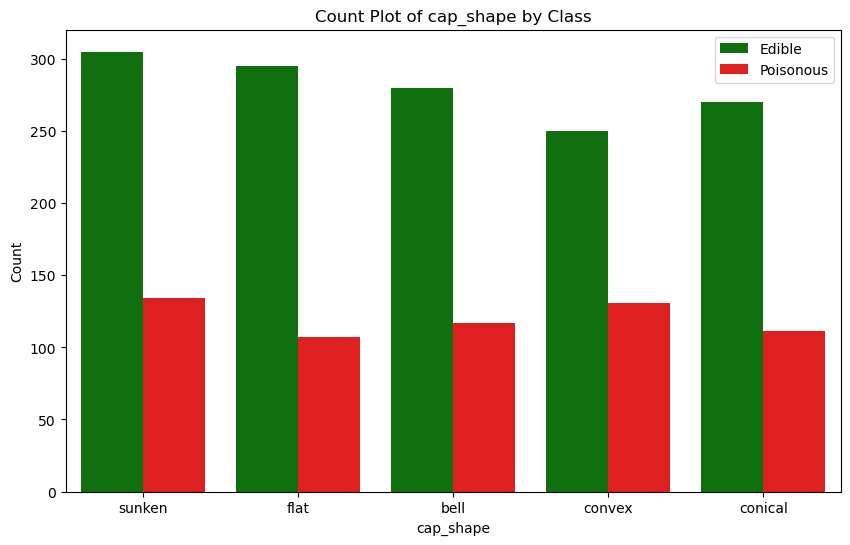

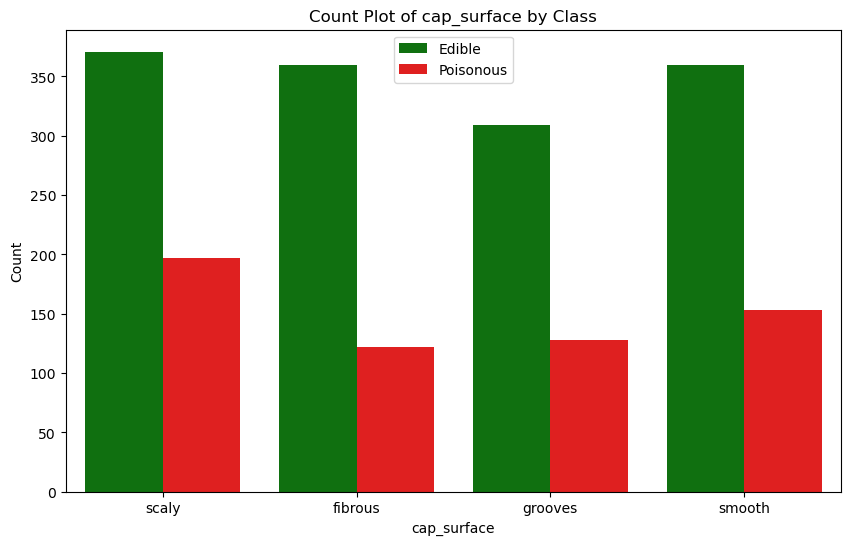

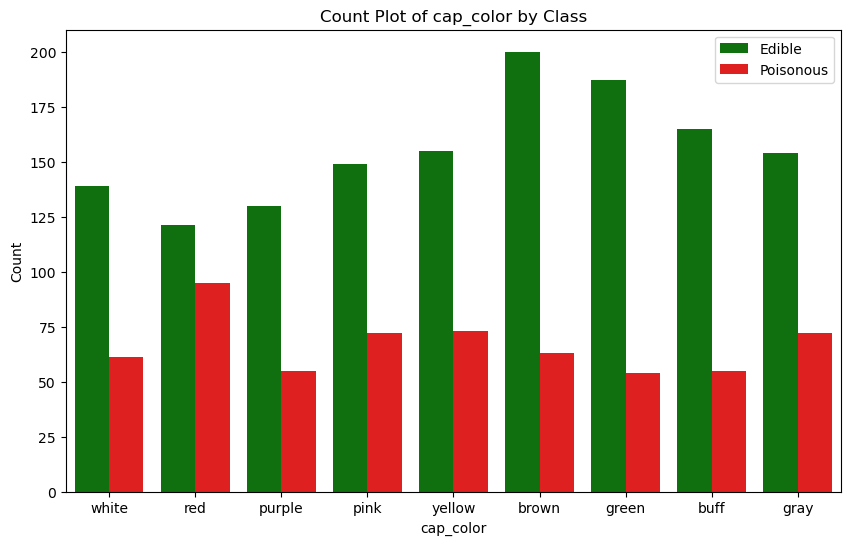

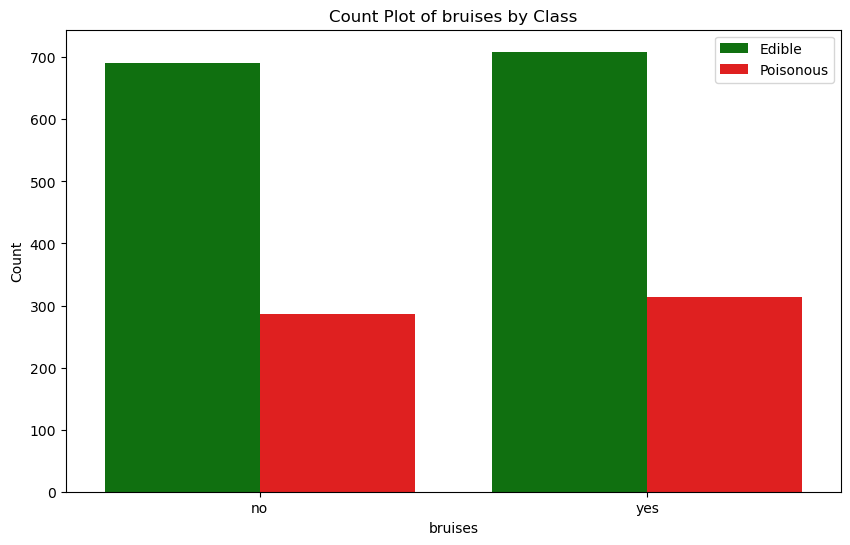

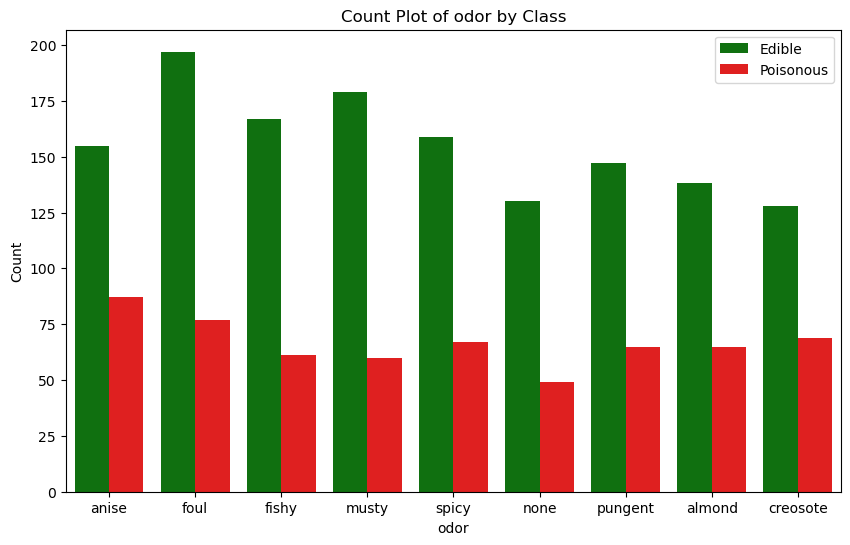

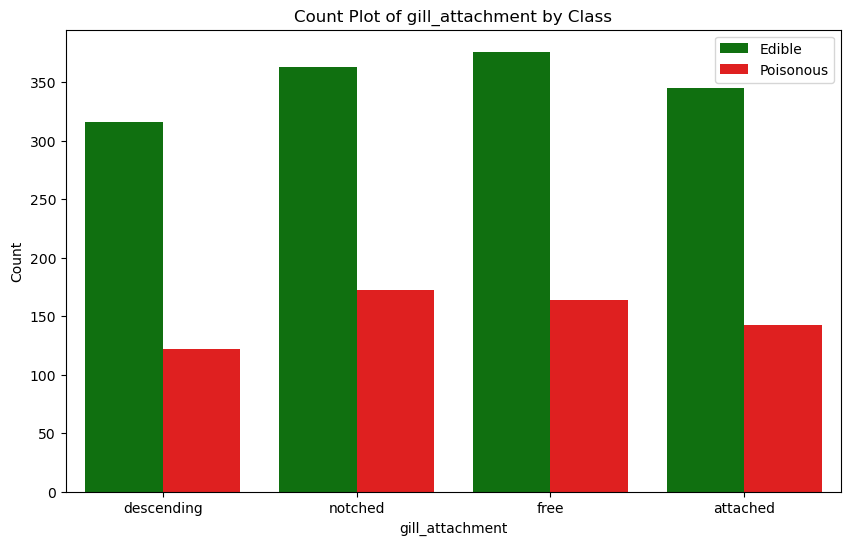

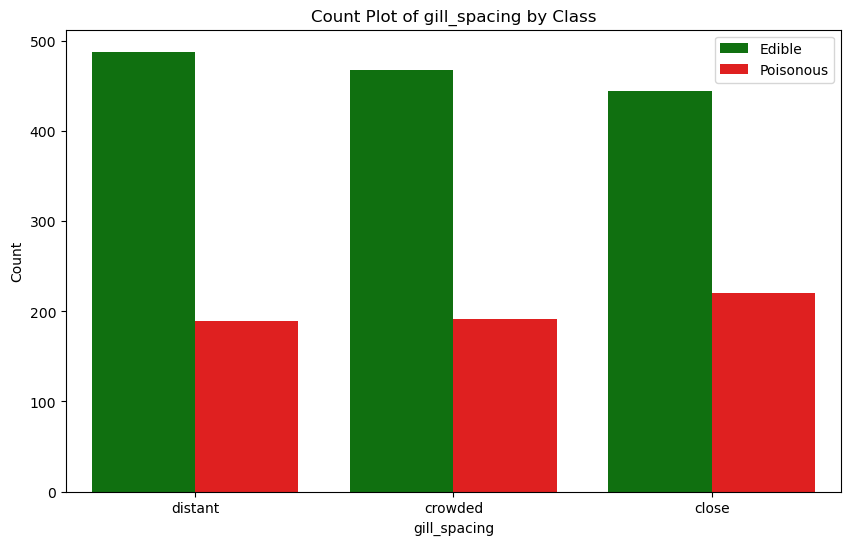

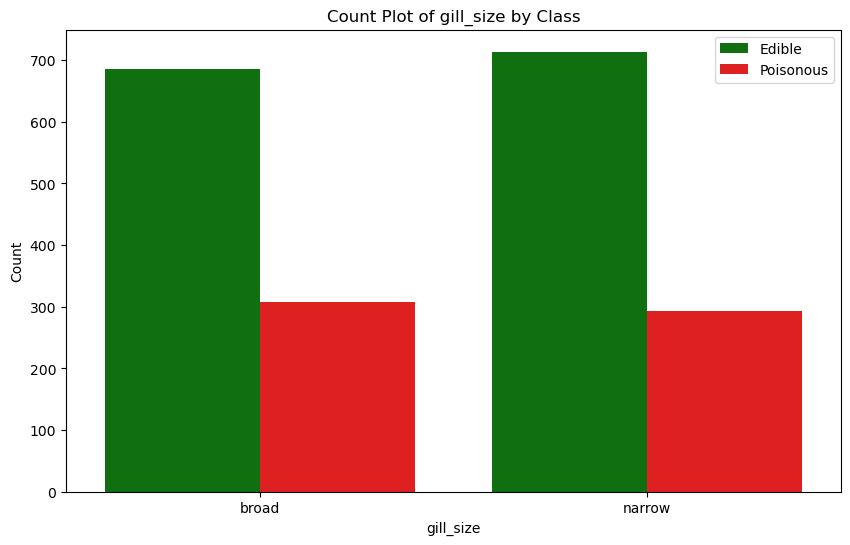

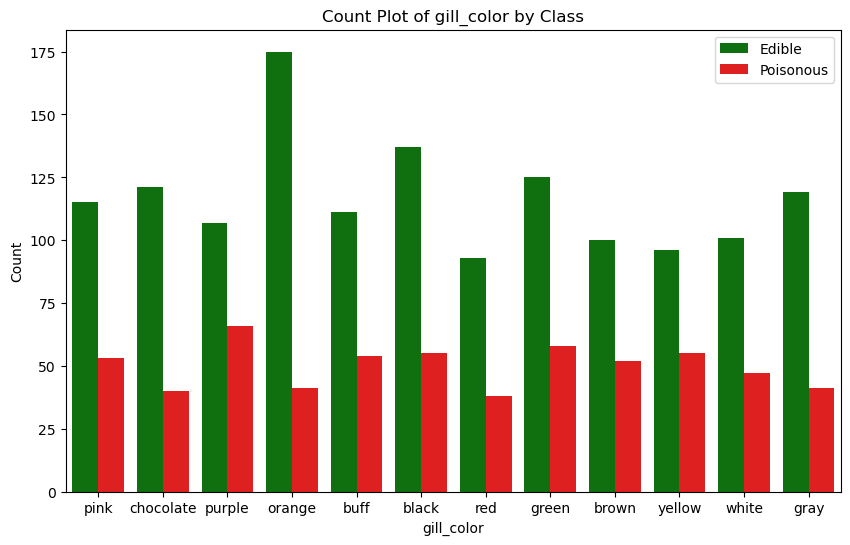

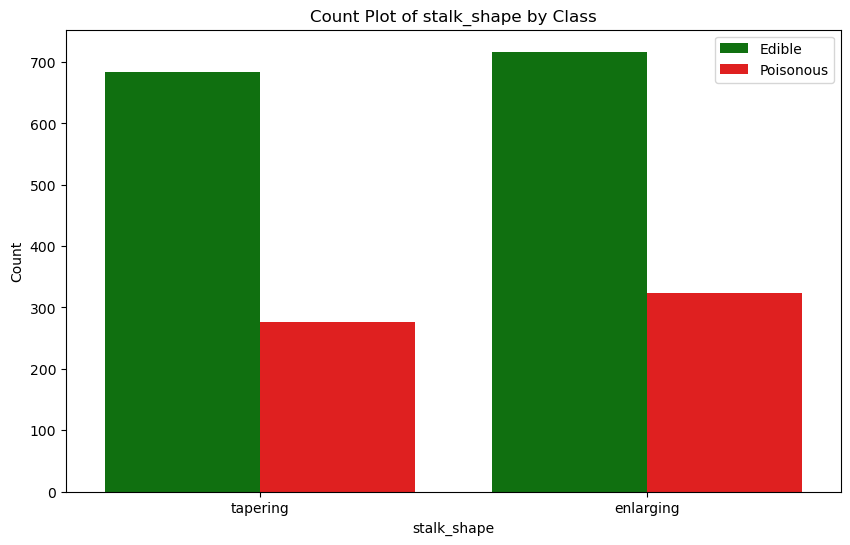

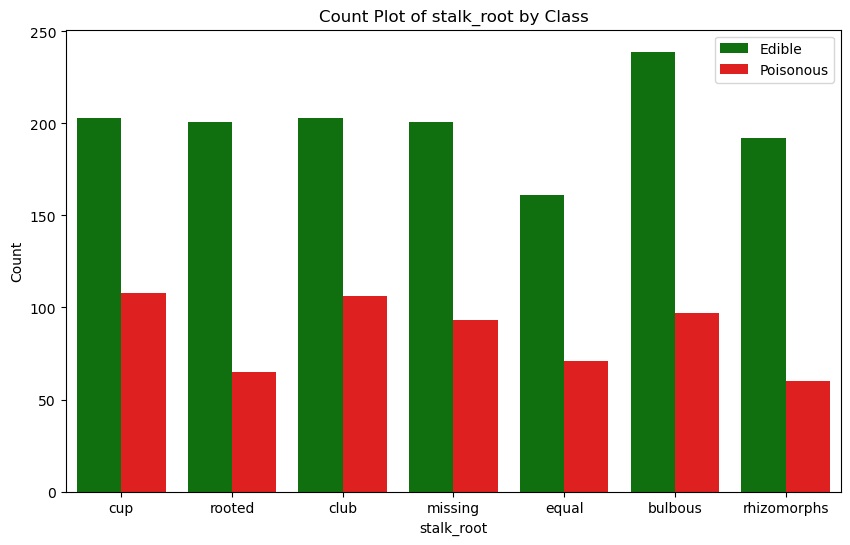

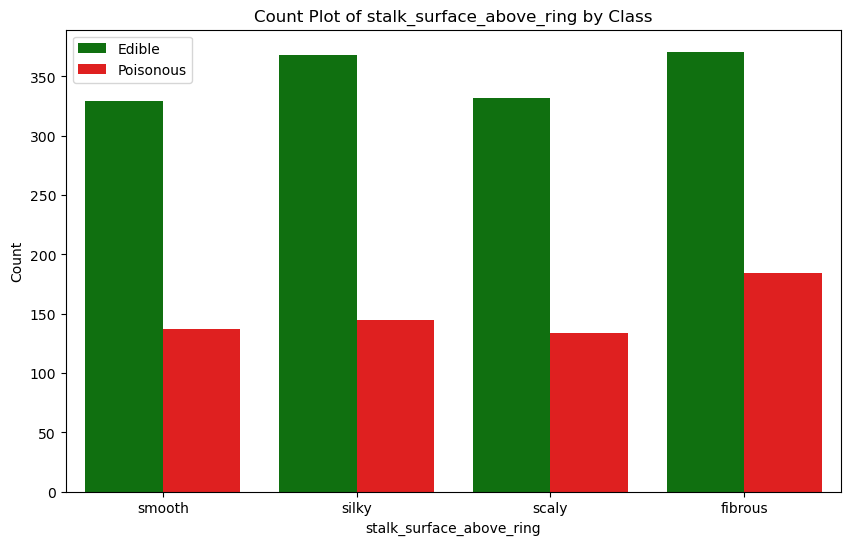

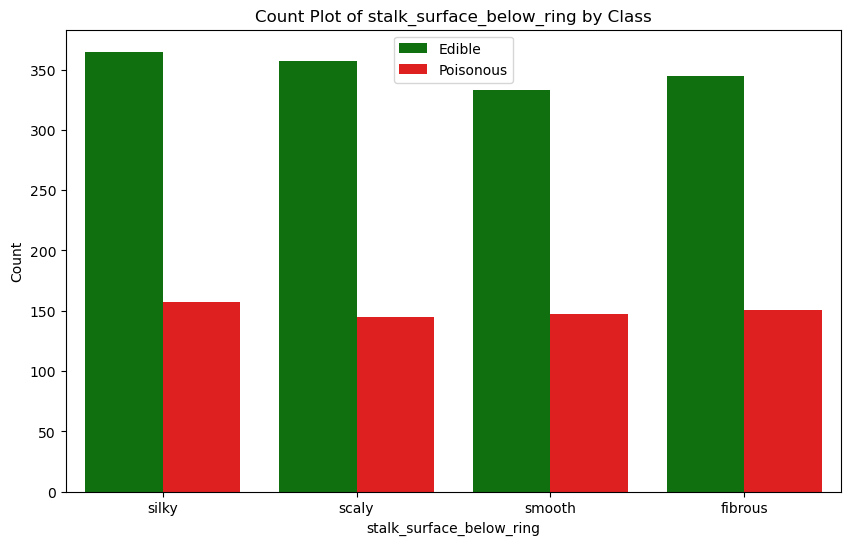

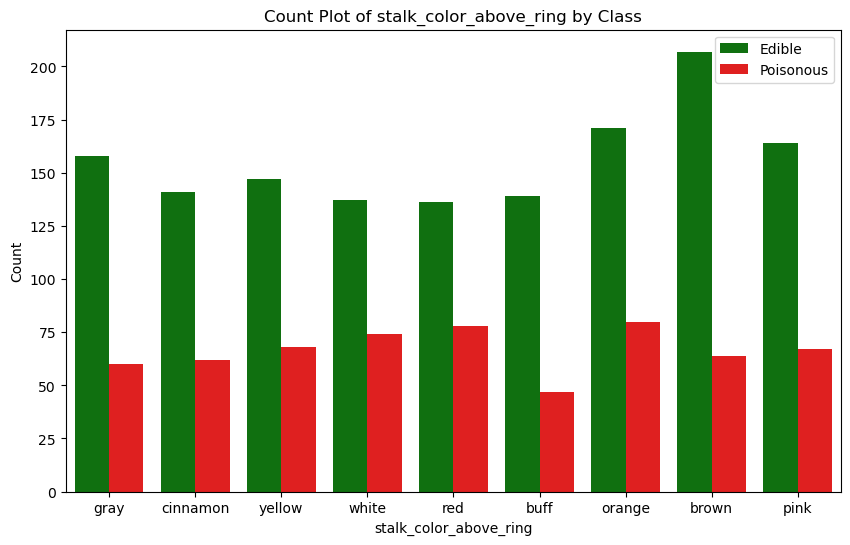

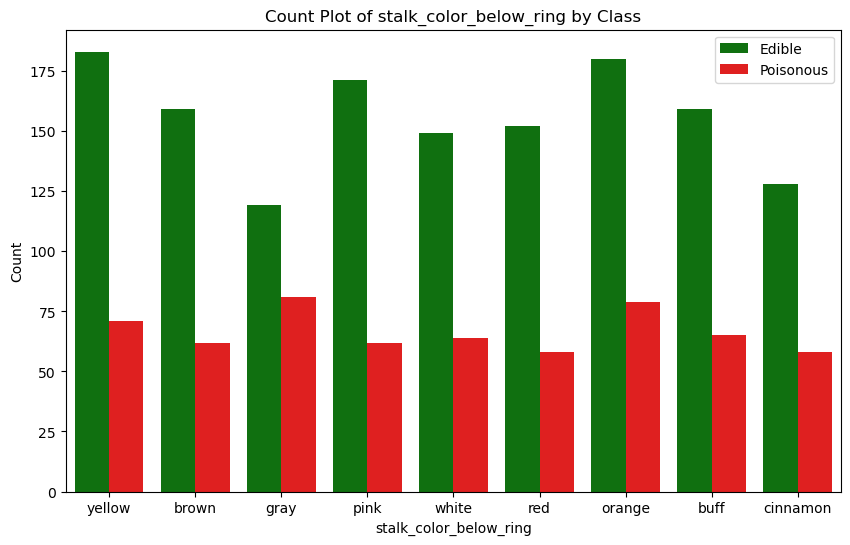

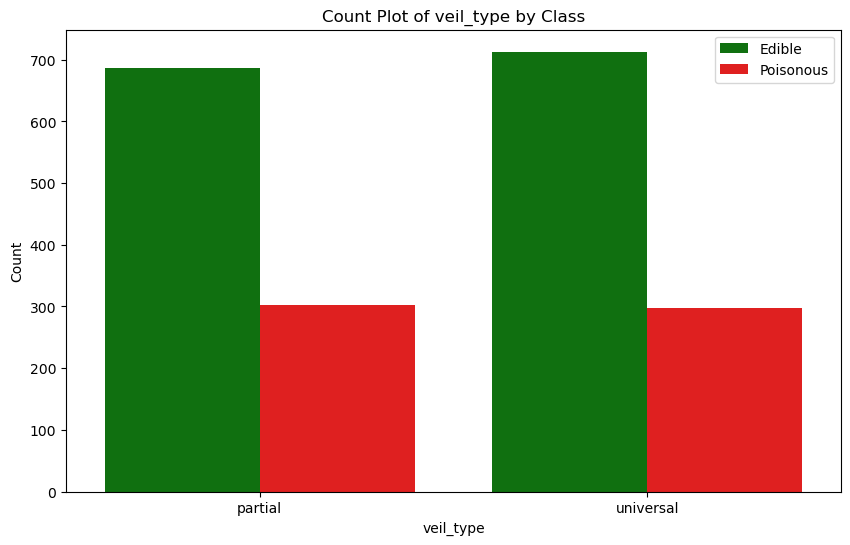

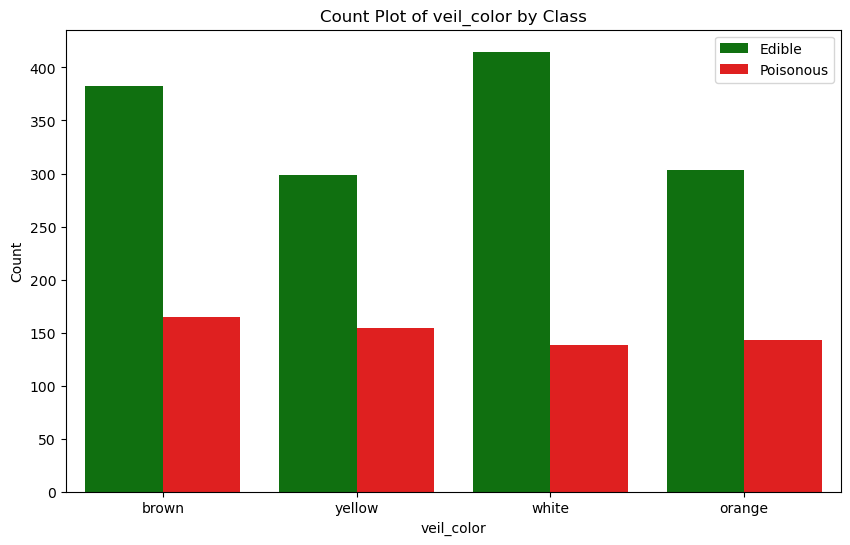

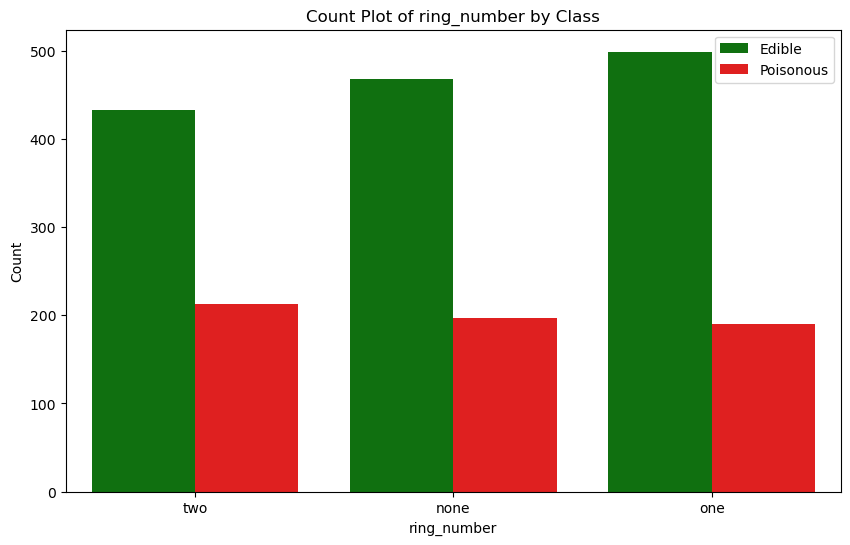

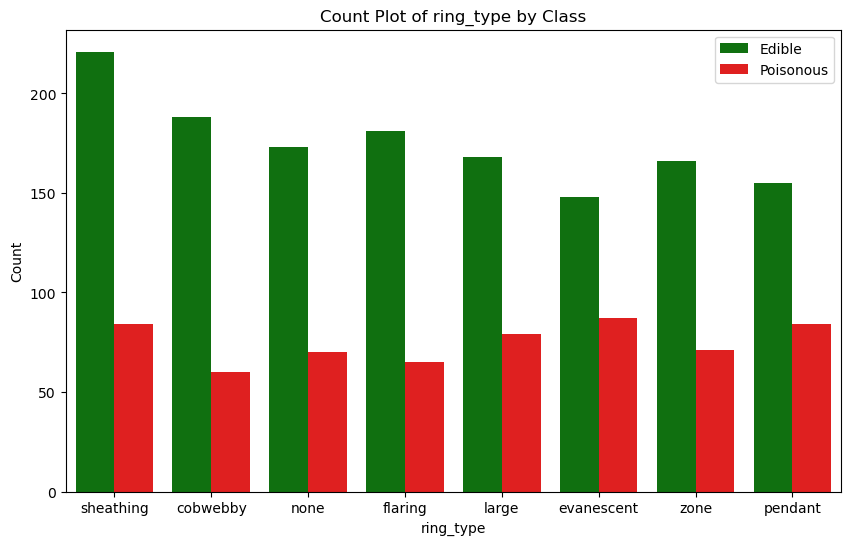

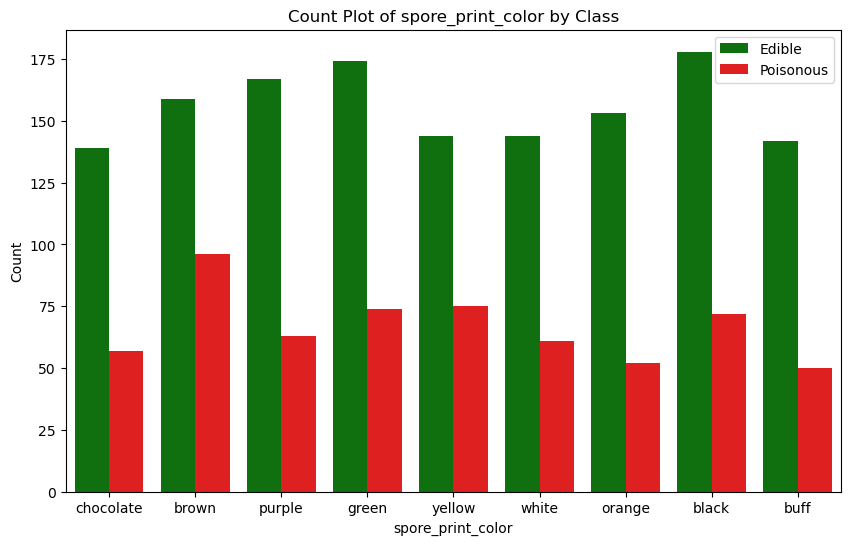

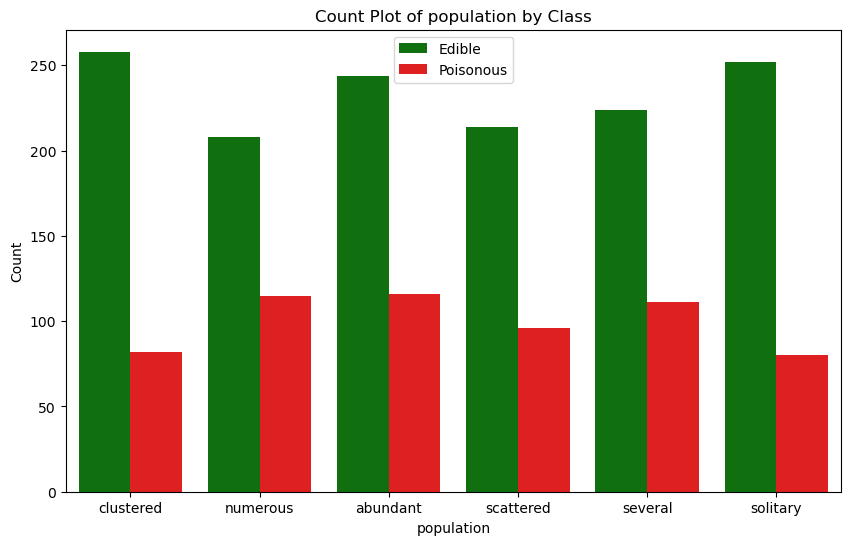

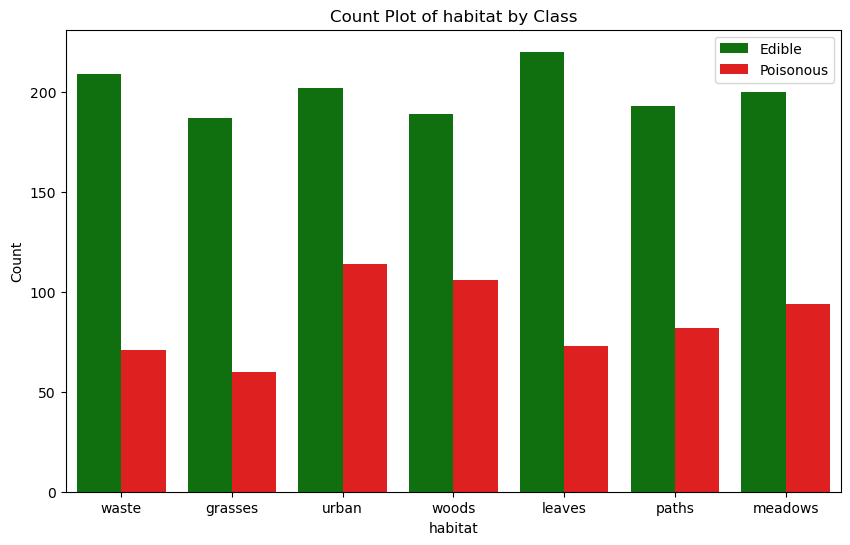

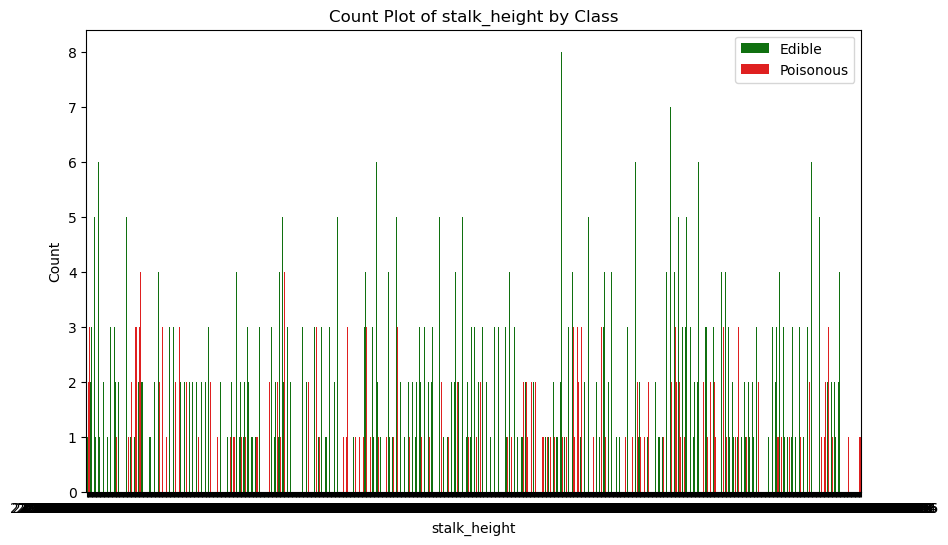

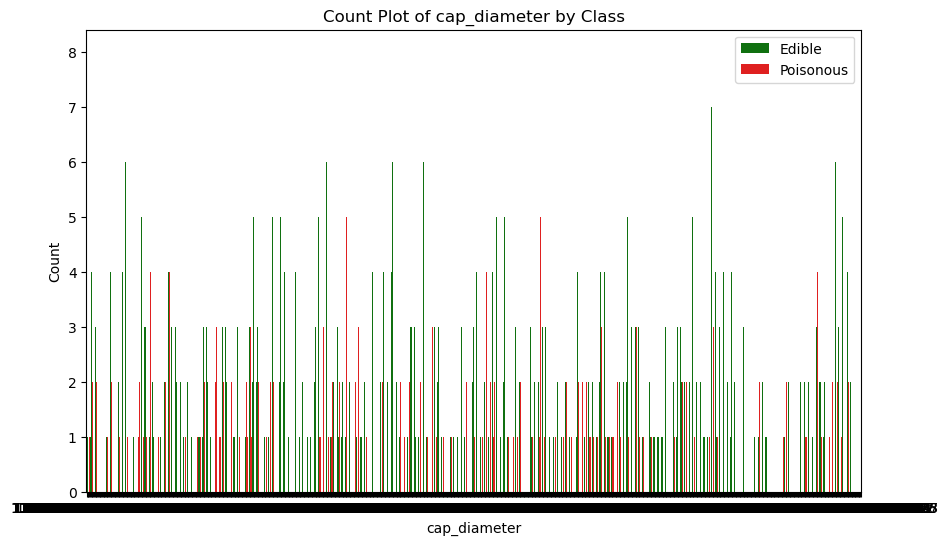

In [9]:
# Ensure 'class' column exists
if 'class' in df.columns:
    columns = df.columns.tolist()
    columns.remove('class')  # Exclude the class column from the loop

    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, hue='class', palette=['green', 'red'])
        plt.title(f'Count Plot of {column} by Class')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(['Edible', 'Poisonous'])
        plt.show()
else:
    print("The 'class' column is not found in the dataframe.")

In [10]:
# Encode the categorical features and target variable
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [11]:
df.head(20)

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0           4            2          7        0     1                1   
1           4            0          6        0     1                3   
2           3            1          5        1     4                1   
3           0            2          4        1     3                3   
4           3            3          8        1     5                2   
5           2            1          4        0     8                0   
6           0            3          0        0     1                2   
7           1            0          7        1     6                3   
8           1            1          3        1     7                0   
9           2            2          0        1     0                0   
10          2            2          1        1     3                0   
11          0            3          0        1     6                3   
12          4            1          2        1     2                3   
13          3            3          1        0     7                1   
14          4            2          2        1     7                2   
15          1            1          7        1     6                2   
16          0            3          4        0     4                3   
17          2            2          3        1     5                0   
18          1            1          8        1     1                0   
19          4            3          2        1     1                2   

    gill_spacing  gill_size  gill_color  stalk_shape  stalk_root  \
0              2          0           7            1           2   
1              1          1           3            0           6   
2              1          0           8            1           2   
3              0          0           6            0           1   
4              1          1           6            0           4   
5              1          0           6            0           1   
6              2          0           2            1           4   
7              0          1           0            1           3   
8              1          1           2            1           1   
9              1          0           9            1           0   
10             0          0           8            0           3   
11             2          0           0            1           2   
12             1          1           5            0           3   
13             2          0           1            1           0   
14             1          1           8            0           1   
15             1          0          11            0           2   
16             2          0           7            0           6   
17             2          0           9            1           0   
18             1          1           1            1           4   
19             2          0          11            1           2   

    stalk_surface_above_ring  stalk_surface_below_ring  \
0                          3                         2   
1                          2                         2   
2                          1                         2   
3                          3                         1   
4                          0                         1   
5                          3                         3   
6                          1                         3   
7                          1                         0   
8                          2                         3   
9                          2                         1   
10                         0                         0   
11                         2                         0   
12                         0                         0   
13                         0                         0   
14                         0                         0   
15                         3                         2   
16                         3                         0 

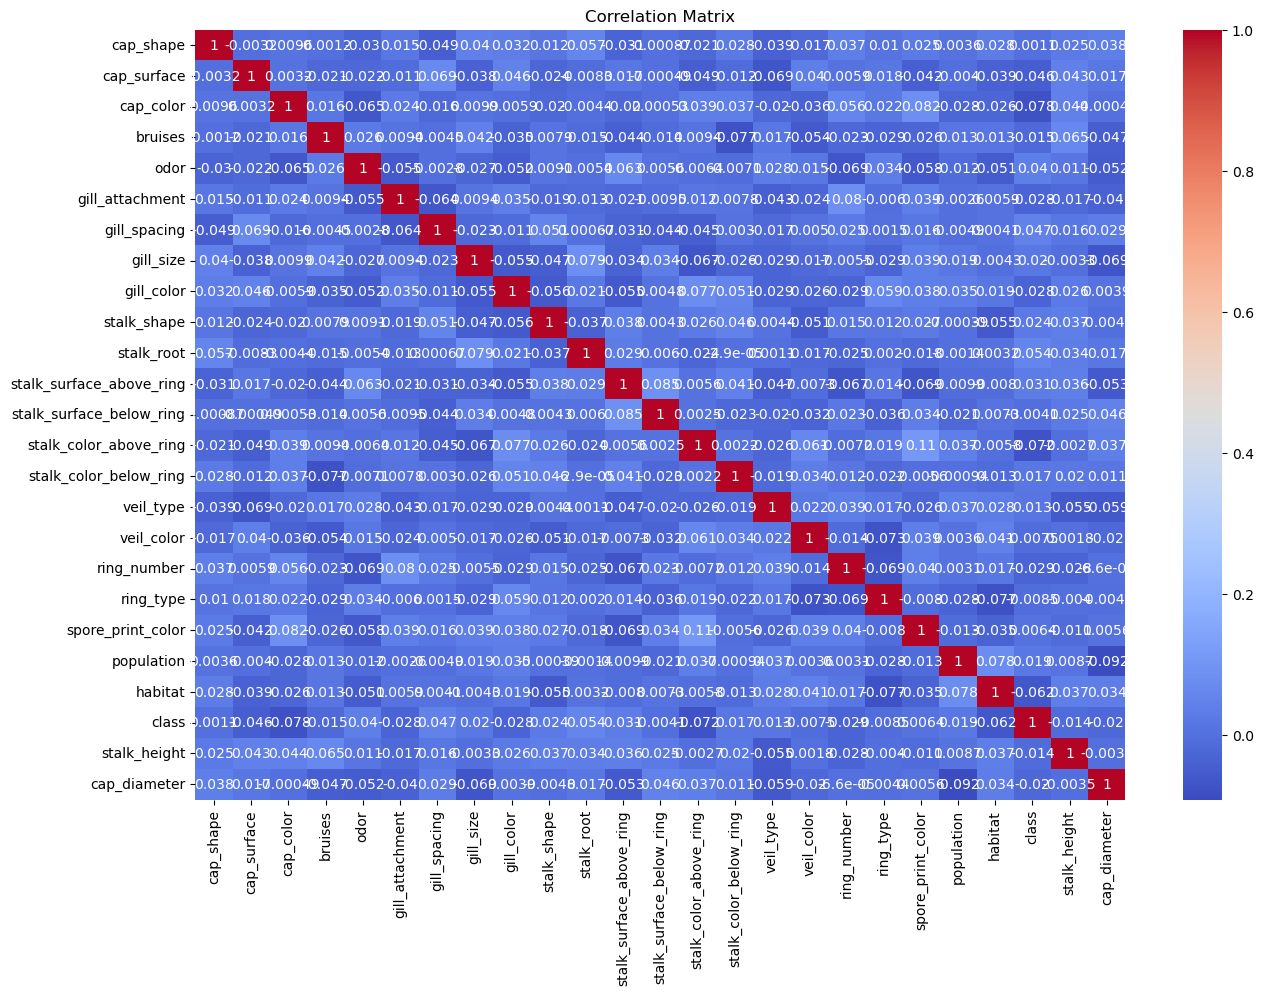

In [12]:
# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Reduce dimensionality to 2 features for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
# Train the SVM classifier on the PCA-transformed data
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(X_train_pca, y_train)

SVC(kernel='poly')

In [18]:
# Predict the test set results
y_pred_pca = svm_classifier.predict(X_test_pca)

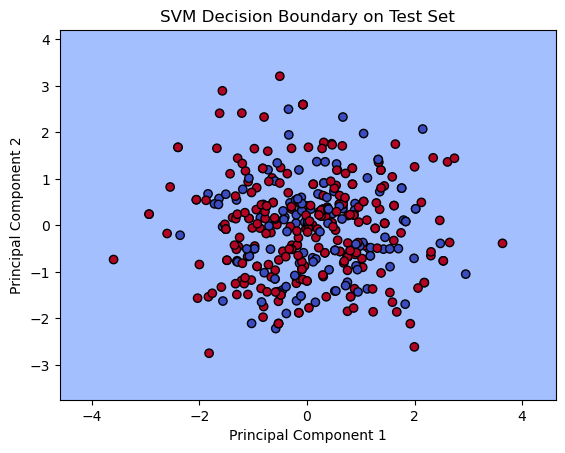

In [19]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot the decision boundary for the test set
plot_decision_boundary(X_test_pca, y_test, svm_classifier, 'SVM Decision Boundary on Test Set')

## Train the SVM classifier

In [20]:
# for kernel = linear
svm_classifier = SVC(kernel='linear')  # You can also try 'rbf', 'poly', 'sigmoid' kernels
svm_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = svm_classifier.predict(X_test)

In [21]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[  0 133]
 [  0 267]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Accuracy Score: 0.6675


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



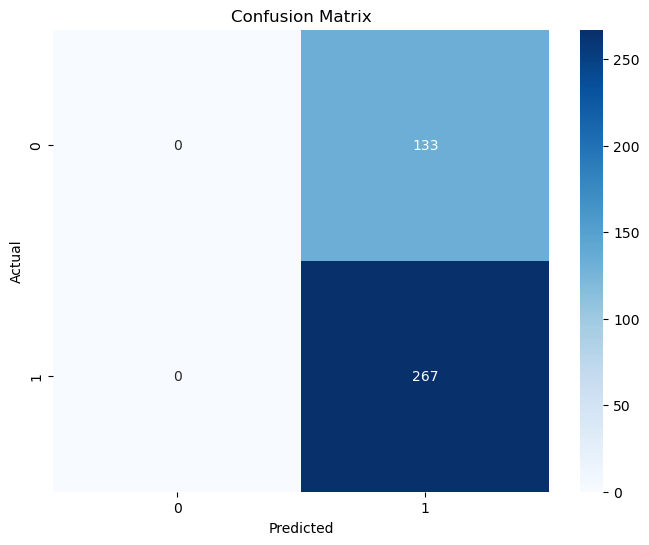

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# for kernel = linear
svm_classifier = SVC(kernel='rbf')  # You can also try 'rbf', 'poly', 'sigmoid' kernels
svm_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = svm_classifier.predict(X_test)

In [24]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[ 49  84]
 [  4 263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.37      0.53       133
           1       0.76      0.99      0.86       267

    accuracy                           0.78       400
   macro avg       0.84      0.68      0.69       400
weighted avg       0.81      0.78      0.75       400

Accuracy Score: 0.78


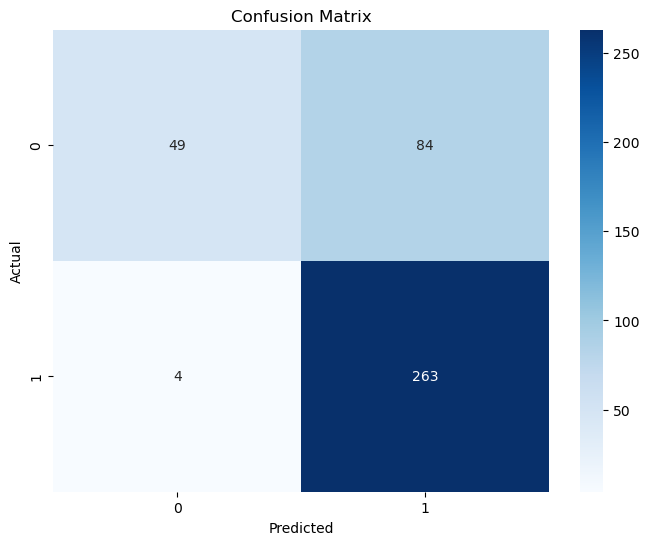

In [25]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
# for kernel = linear
svm_classifier = SVC(kernel='poly')  # You can also try 'rbf', 'poly', 'sigmoid' kernels
svm_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = svm_classifier.predict(X_test)

In [27]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[ 73  60]
 [ 11 256]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       133
           1       0.81      0.96      0.88       267

    accuracy                           0.82       400
   macro avg       0.84      0.75      0.78       400
weighted avg       0.83      0.82      0.81       400

Accuracy Score: 0.8225


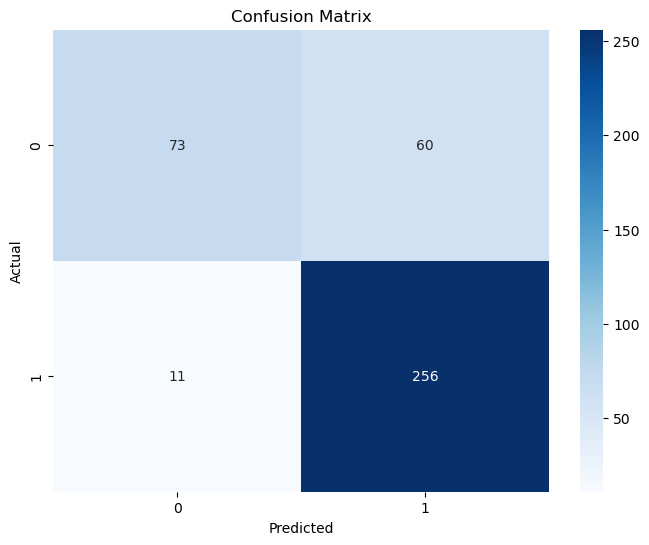

In [28]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# for kernel = linear
svm_classifier = SVC(kernel='sigmoid')  # You can also try 'rbf', 'poly', 'sigmoid' kernels
svm_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = svm_classifier.predict(X_test)

In [30]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[  0 133]
 [  8 259]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.66      0.97      0.79       267

    accuracy                           0.65       400
   macro avg       0.33      0.49      0.39       400
weighted avg       0.44      0.65      0.52       400

Accuracy Score: 0.6475


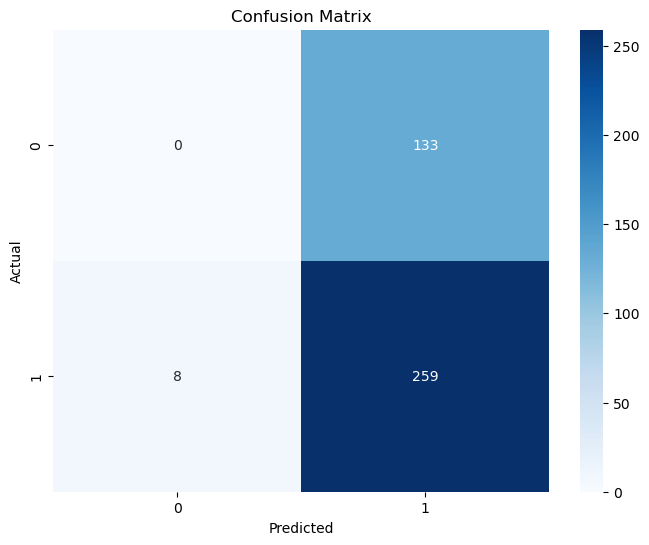

In [31]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Observation:
Based on comparison with various kernels, kernal='poly' works better than the rest